<a href="https://colab.research.google.com/github/Magic-Freeza/DNC_modeling/blob/main/RID1234_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from scipy.stats import zscore
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import partial_dependence
from scipy.optimize import minimize
from itertools import product

**# Data Understanding**

Fases:

**Collect Initial Data:** Initial Data Collection

**Describe Data:** Data Description

**Explore Data:** Data Exploration

**Verify Data Quality:** Data Quality Report

Initial Data Collection:

- Os dados estão arquivado está na maquina no arquivo MKT.csv, foi ultilizado a biblioteca files do google. colab, documentação abaixo:
  - https://colab.research.google.com/github/ccfernandes600/Python_com_Google_Colab_e_Gemini/blob/main/Python_com_Google_Colab_do_zero.ipynb

In [ ]:
def importar_arquivo(diretorio=None):
    """
    Função para carregar um arquivo CSV.
    Se o caminho do diretório não for fornecido, será solicitado o upload manual.

    Parâmetros:
    - diretorio (str): Caminho do arquivo no computador local.

    Retorna:
    - DataFrame carregado no Pandas.
    """
    if diretorio:
        # Importa diretamente de um caminho fornecido
        print(f"Carregando arquivo do caminho: {diretorio}")
        try:
            df = pd.read_csv(diretorio)
            print("Arquivo carregado com sucesso!")
            return df
        except Exception as e:
            print(f"Erro ao carregar o arquivo: {e}")
            return None
    else:
        # Solicita o upload manual no Colab
        print("Faça o upload do arquivo manualmente:")
        uploaded = files.upload()
        for filename in uploaded.keys():
            print(f"Arquivo carregado: {filename}")
            try:
                df = pd.read_csv(filename)
                print("Arquivo carregado com sucesso!")
                return df
            except Exception as e:
                print(f"Erro ao carregar o arquivo: {e}")
                return None

def importar_arquivo(diretorio=None):
    """
    Função para carregar um arquivo CSV.
    Se o caminho do diretório não for fornecido, será solicitado o upload manual.

    Parâmetros:
    - diretorio (str): Caminho do arquivo no computador local.

    Retorna:
    - DataFrame carregado no Pandas.
    """
    if diretorio:
        # Importa diretamente de um caminho fornecido
        print(f"Carregando arquivo do caminho: {diretorio}")
        try:
            df = pd.read_csv(diretorio)
            print("Arquivo carregado com sucesso!")
            return df
        except Exception as e:
            print(f"Erro ao carregar o arquivo: {e}")
            return None
    else:
        # Solicita o upload manual no Colab
        print("Faça o upload do arquivo manualmente:")
        uploaded = files.upload()
        for filename in uploaded.keys():
            print(f"Arquivo carregado: {filename}")
            try:
                df = pd.read_csv(filename)
                print("Arquivo carregado com sucesso!")
                return df
            except Exception as e:
                print(f"Erro ao carregar o arquivo: {e}")
                return None



# **Data Description**
O df principal é bem comportado com relação diposnibilidade das informações, temos:
  - Todas as informações são do tipo float64;
  - Não temos dados nulos no df;
  - Entretanto temo uma baixa quantidade de dados, apenas 171 linhas, o que pode impctar na precisão do modelo;
  - Aparentemente a base de dados já foi previamente trata, já que não temos dados nulos e com tipos incoerentes.
  - As features 'youtube', 'facebook' e 'newspaper' estão apresentando o investimentos mensal em publicidade com objetivo de converter lead em vendas.
  - A feature 'sales' é o retorno mensal desse investimento.
  

In [ ]:
#criando o df principal a partir da base de dados MKT disponibilizada no desafio
df = importar_arquivo(diretorio="/content/MKT.csv")
df.head()

Carregando arquivo do caminho: /content/MKT.csv
Arquivo carregado com sucesso!


,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Avaliando as informações do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#Entendendo a dimensão dos dados
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# **Analisando a efetividade do investimento em publicidade digital.**

Calculando o ROI (Retorno sobre o investimento) da operação, chegamos em -92,98%, portanto, o investimento atual em publicidade esta tendo um pessimo retorno no periodo analisado. Gerando um prejuizo de R$ 38.305,68.

In [ ]:
#Calculando as soma dos valores de cada coluna.
total_youtuber = df['youtube'].sum()
total_facebook = df['facebook'].sum()
total_newspaper = df['newspaper'].sum()
total_sales = df['sales'].sum()

#Calculos de total de investimento, retorno, ROI.
total_investimento = total_youtuber + total_facebook + total_newspaper
retorno = (total_sales-total_investimento)
ROI = ((retorno)/total_investimento)*100

#Printando as informações calculdas.
print('O investimento total foi de: {:.2f}'.format(total_investimento))
print('O faturamento total da operação foi de: {:.2f}'.format(total_sales))
print("O ROI (retorno sobre o investimento) da operação foi de: {:.2f}%".format(ROI))
print("O retorno da operação foi de: {:.2f}".format(retorno))

O investimento total foi de: 41199.48
O faturamento total da operação foi de: 2893.80
O ROI (retorno sobre o investimento) da operação foi de: -92.98%
O retorno da operação foi de: -38305.68


# **Data Preparation**
  
  Avaliando a normalidade dos dados:

  - Apenas a a feature "sales", possui um perfil estatistico de distribuição de dados aparentemente normal, porém aplicando os metodos de Shapiro-Wilk (https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk) e Anderson-Darling (https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test), temos:
    - Shapiro-Wilk Test: Statistic=0.9754, p-value=0.0039
    - Anderson-Darling Test: Statistic=1.5349
    - Shapiro-Wilk: A variável-alvo não segue uma distribuição normal.
    - Anderson-Darling: A variável-alvo não segue uma distribuição normal.
    - Portanto, nenhum dos dois metodos apontam que a vaiavel sales possui uma distribuição normal.

  - As features "youtube", "facebook" e	"newspaper" não possuem uma distribuição nomal dos dados. Estas poderiam se se aproximar em outros perfis estatisticos de distribuição de dados.
  - O tratamento de outliear será realizado considerando a não normalidade dos dados. Portanto ultilizamos o metódo IQR, segue o resumo da pesquisa realizada:
  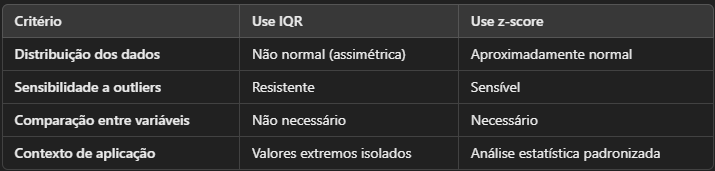


In [ ]:
#Avaliando se temos linhas duplicadas
df.duplicated().sum()

0

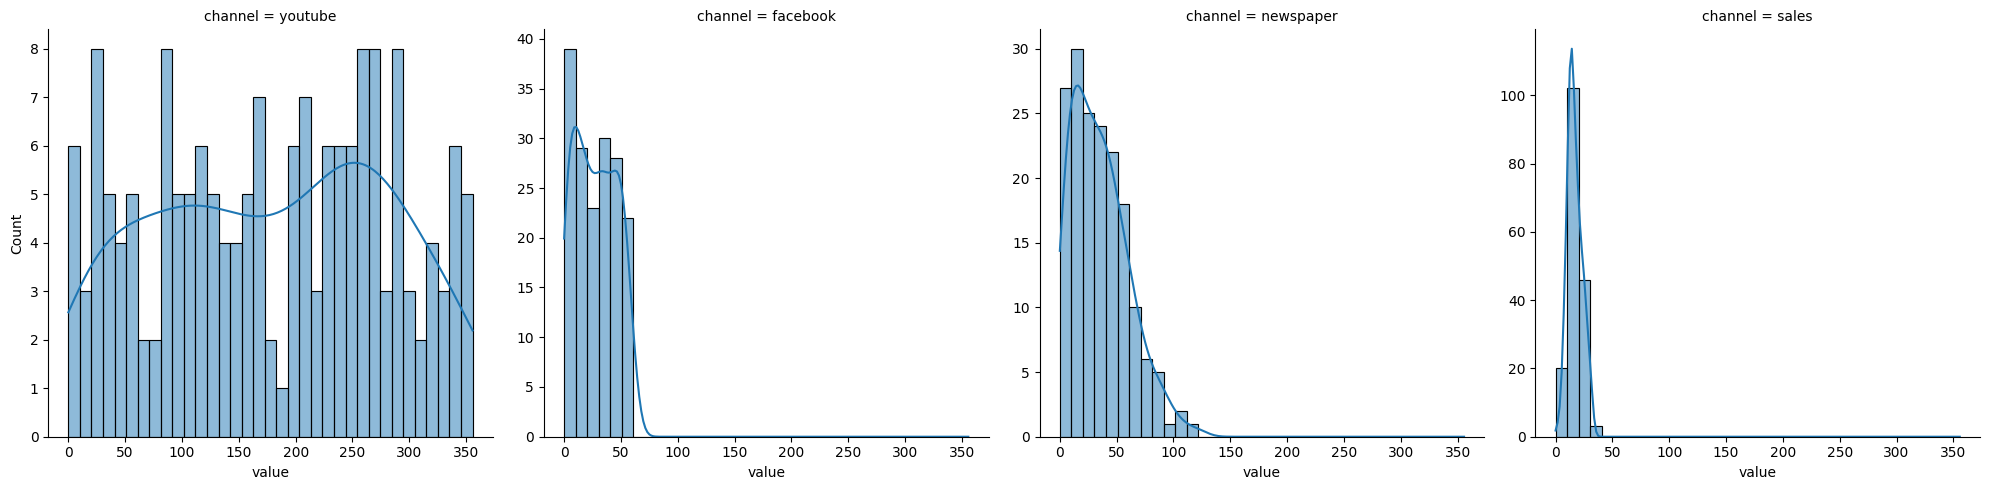

In [ ]:
#Avaliando a normalidade dos dados graficamente
df_melted = df.melt(var_name='channel', value_name='value')

# Criar o gráfico
sns.displot(data=df_melted, x='value', col='channel', kde=True, facet_kws={'sharex': False, 'sharey': False})

In [ ]:
# Supondo que sua variável-alvo seja 'sales'.
target = df['sales']

# Teste de Shapiro-Wilk.
shapiro_test = stats.shapiro(target)
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.4f}, p-value={shapiro_test.pvalue:.4f}")

# Teste de Anderson-Darling.
anderson_test = stats.anderson(target, dist='norm')
print(f"Anderson-Darling Test: Statistic={anderson_test.statistic:.4f}")

# Interpretação:
if shapiro_test.pvalue > 0.05:
    print("Shapiro-Wilk: A variável-alvo parece seguir uma distribuição normal.")
else:
    print("Shapiro-Wilk: A variável-alvo não segue uma distribuição normal.")

if anderson_test.statistic < anderson_test.critical_values[2]:  # Usando nível de significância de 5%
    print("Anderson-Darling: A variável-alvo parece seguir uma distribuição normal.")
else:
    print("Anderson-Darling: A variável-alvo não segue uma distribuição normal.")

Shapiro-Wilk Test: Statistic=0.9754, p-value=0.0039
Anderson-Darling Test: Statistic=1.5349
Shapiro-Wilk: A variável-alvo não segue uma distribuição normal.
Anderson-Darling: A variável-alvo não segue uma distribuição normal.


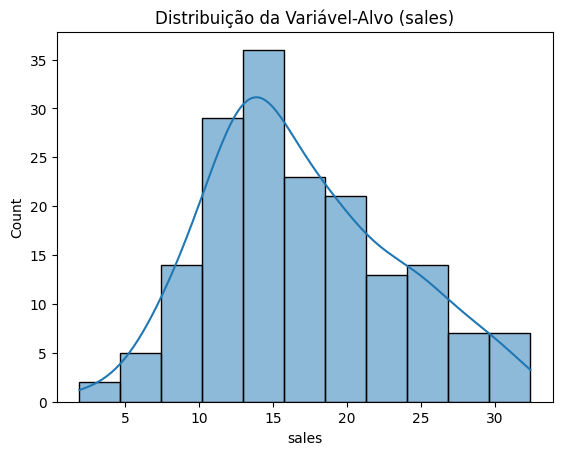

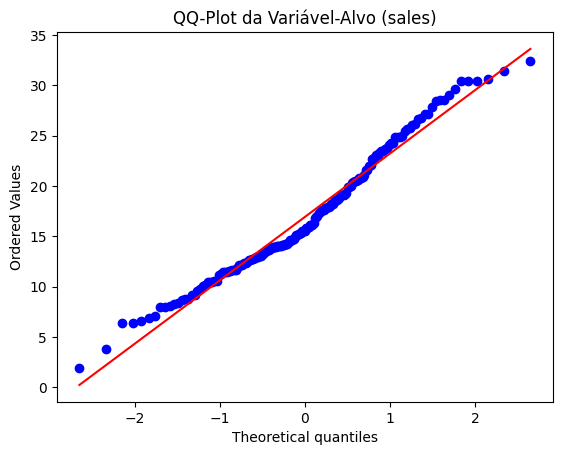

In [ ]:
# Histograma com densidade
sns.histplot(target, kde=True)
plt.title("Distribuição da Variável-Alvo (sales)")
plt.show()

# Gráfico QQ-plot (quantile-quantile)
stats.probplot(target, dist="norm", plot=plt)
plt.title("QQ-Plot da Variável-Alvo (sales)")
plt.show()

Avaliando a correlação entre as features:

- youtube:
  - Corr = 0.78, entre as variaveis é a feature que apresenta o maior grau de correlação com a variavel alvo.
  - Considerando o grafico de dispersão entre a feature Youtube e a variavel alvo, é possivel estimar que existe uma relação logaritimica.

- facebook:
  - Corr: 0.6, entre as variaveis é a feature que apresenta o segundo maior grau de correlação com a variavel alvo.
  - Considerando o grafico de dispersão entre a feature Facebook e a variavel alvo, é possivel estimar que existe uma aparentemente relação linear.

- newspaper:
  - Corr: 0.25, entre as variaveis é a feature que apresenta o menor grau de correlação com a variavel alvo.
  - Considerando o grafico de dispersão entre a feature newspaper e a variavel alvo, visualmente não é possivel definir alguma função que possa descrever a variavel alvo em função da feature newspaper.




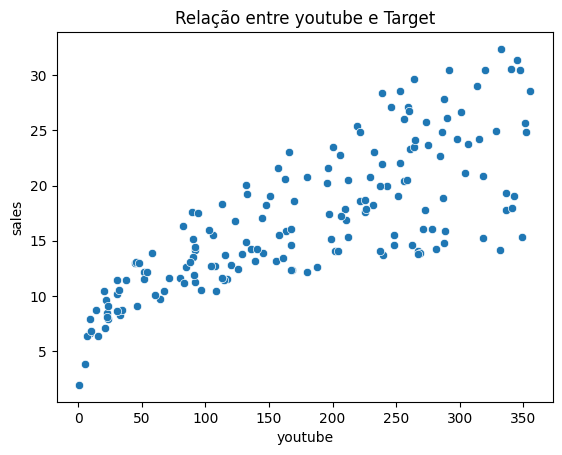

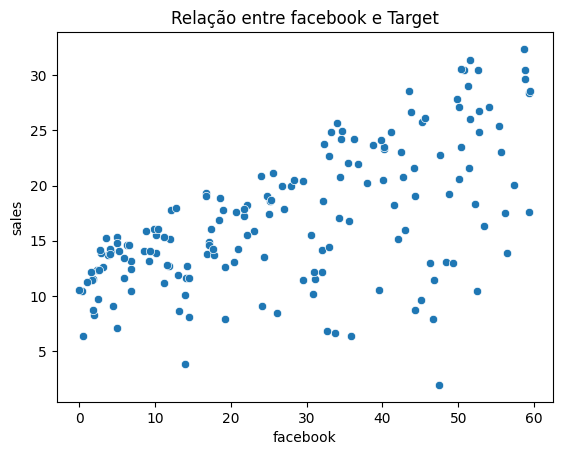

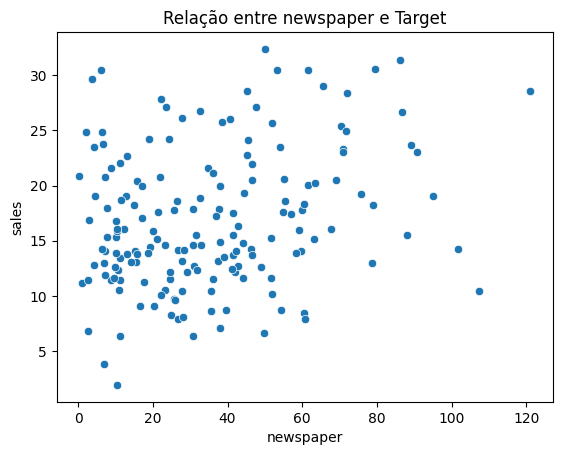

In [ ]:
for col in df.drop(columns=['sales']).columns:
    sns.scatterplot(x=df[col], y=df['sales'])
    plt.title(f"Relação entre {col} e Target")
    plt.show()

In [ ]:
# Basic correlogram
#sns.pairplot(df)
#plt.show()

In [ ]:
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Transformação de variáveis baseada na assimetria (skewness)
https://www.scribbr.co.uk/stats/skewness-meaning/

- Após analisar chegamos a conclusão que:
  - Nenhuma transformação necessária para youtube
  - Nenhuma transformação necessária para facebook
  - Nenhuma transformação necessária para newspaper

In [ ]:
#Avaliando a necessidade de transformação das features por meio da transformação de variáveis baseada na assimetria (skewness)
transformed_df = df.copy()

for col in df.drop(columns=['sales']).columns:
    if df[col].skew() > 1:  # Assimétrica positiva
        transformed_df[col] = np.log1p(df[col])
        print(f"Transformação log aplicada em {col}")
    elif df[col].skew() < -1:  # Assimétrica negativa
        transformed_df[col] = np.sqrt(df[col] * -1)
        print(f"Transformação de raiz aplicada em {col}")
    else:
        print(f"Nenhuma transformação necessária para {col}")

Nenhuma transformação necessária para youtube
Nenhuma transformação necessária para facebook
Nenhuma transformação necessária para newspaper


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = ((df < lower_bound) | (df > upper_bound))
#print(outliers)

# Substituir outliers pela média da sua respectiva coluna
df_no_outliers_IQR = df.mask(outliers, other= df.mean(), axis=1)

df_no_outliers_IQR.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,34.316725,16.922807
std,102.449597,17.913532,23.354351,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,49.320000,20.820000
max,355.680000,59.520000,101.760000,32.400000


In [ ]:
# Não foi ultilizada, desenvovi para teste.
'''
# Calcular o z-score
z_scores = df.apply(zscore, nan_policy='omit')

# Definir um limite (por exemplo, 3)
threshold = 3
outliers_z = (z_scores.abs() > threshold)
#print(outliers_z)

# Tratar outliers
df_no_outliers_z = df.mask(outliers_z, other= df.mean(), axis=1)
df_no_outliers_z.describe()
'''

"\n# Calcular o z-score\nz_scores = df.apply(zscore, nan_policy='omit')\n\n# Definir um limite (por exemplo, 3)\nthreshold = 3\noutliers_z = (z_scores.abs() > threshold)\n#print(outliers_z)\n\n# Tratar outliers\ndf_no_outliers_z = df.mask(outliers_z, other= df.mean(), axis=1)\ndf_no_outliers_z.describe()\n"

In [ ]:
#seguindo com o metodo IQR para tratamento de outliers
df = df_no_outliers_IQR

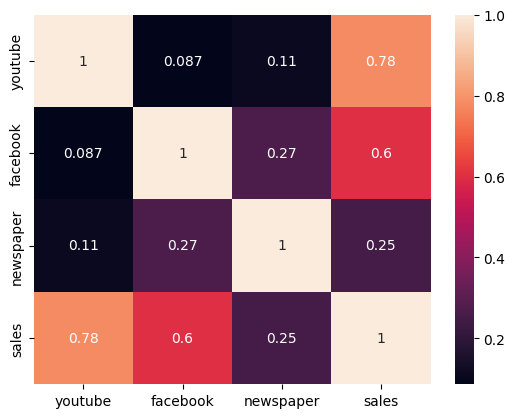

In [ ]:
heat_map = sns.heatmap(df.corr(), annot=True)

In [ ]:
#Avaliando grau de correlação entre variaveis
correlation = df.corr(method='spearman')
target_corr = correlation['sales'].sort_values()
print(target_corr)

newspaper    0.207453
facebook     0.587763
youtube      0.799957
sales        1.000000
Name: sales, dtype: float64


# **Modeling**

- Modelos escolhidos:
  - SVR - Epsilon-Support Vector Regression. (https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html)
  -  Decision tree (Sklearn) - (https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
  - XGB boost - (https://xgboost.readthedocs.io/en/stable/python/model.html)


In [ ]:
X = df.drop(columns=['sales'])
y = df['sales']

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
list_r_2 = list()
list_mse = list()

In [ ]:
# Criar o modelo de regressão SVM
model_SVR = svm.SVR()

# Treinar o modelo nos dados de treino
model_SVR.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_SVR = model_SVR.predict(X_test)

# Avaliar a performance do modelo
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)

list_r_2.append(r2_SVR)
list_mse.append(mse_SVR)

print(f"Mean Squared Error (MSE): {mse_SVR:.2f}")
print(f"R² Score: {r2_SVR:.2f}")

Mean Squared Error (MSE): 7.98
R² Score: 0.82


In [ ]:
# Criar o modelo de regressão regressão por arvoré
model_tree = DecisionTreeRegressor()

# Treinar o modelo nos dados de treino
model_tree.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_tree = model_tree.predict(X_test)

# Avaliar a performance do modelo
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

list_r_2.append(r2_tree)
list_mse.append(mse_tree)

print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")

Mean Squared Error (MSE): 2.59
R² Score: 0.94


In [ ]:
# Criar o modelo de regressão XGBoost
model_XGB = XGBRegressor()

# Treinar o modelo nos dados de treino
model_XGB.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_XGB = model_XGB.predict(X_test)

# Avaliar a performance do modelo
mse_XGB = mean_squared_error(y_test, y_pred_XGB)
r2_XGB = r2_score(y_test, y_pred_XGB)

list_r_2.append(r2_XGB)
list_mse.append(mse_XGB)

print(f"Mean Squared Error (MSE): {mse_XGB:.4f}")
print(f"R² Score: {r2_XGB:.4f}")

Mean Squared Error (MSE): 1.2612
R² Score: 0.9712


O melhor modelo é XGBoost:
- Possui o melhor parametro R^2 (0,97), parametro escolhido pela analise.

In [ ]:
modelos = ['SVR', 'Decision Tree', 'XGBoost']

# Create the DataFrame
df_results = pd.DataFrame({'Modelos': modelos, 'R^2': list_r_2, 'MSE': list_mse})

# Display the DataFrame
df_results

,Modelos,R^2,MSE
0,SVR,0.818144,7.976999
1,Decision Tree,0.940993,2.588297
2,XGBoost,0.971248,1.261180


# **Conclusão**

**Seguindo a analisando a efetividade do investimento em publicidade digital.**

Avaliando a base:
- Avaliando a a base de dados, chegamos conclusão que em nenhum momento da bsae de dados houve uma combinação de investimento entre as plataforma que gerou um retorno positivo. [((df["youtube"] + df["facebook"] + df["newspaper"]) - df["sales"])>0]

Avaliando o modelo:
-Criando resultados teoricos a partir do modelo com melhor ajuste R^2 (XGBoost) a partir de valores teoricos de input, chagamos a conclusão que entre a combinação de valores entre R$ 0 e R$ 1000 para os inputs, não existiria valores de vendas que gere um retorno positivo.

Portanto, a partir dos dados fornecidos chegamos a conclusão que o investimento em publicidade digital da forma como esta sendo realizada não gera um retorno direto nas vendas.

**Proximos passos**

Visando entender as diversas possibilidades que esteja causando um ROI negativo com relação ao investimento em publicidade digital. Como por exemplo: Nicho das publicidades, datas e horarios das postagens, publico alvo, investimentos por publicação e por plataforma, visualização, comentarios nas postagens e outros.


E com sorte, existe a possibilidade de conseguirmos mapear quais são grupos de dados em que o investimento em publicidade digital pode gerar um ROI é possitivo, visando maximixar os resultados desse processo de vendas.


In [ ]:
filtered_df = df[(df["youtube"] + df["facebook"] + df["newspaper"]) < df["sales"]]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    0 non-null      float64
 1   facebook   0 non-null      float64
 2   newspaper  0 non-null      float64
 3   sales      0 non-null      float64
dtypes: float64(4)
memory usage: 0.0 bytes


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,34.316725,16.922807
std,102.449597,17.913532,23.354351,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,49.320000,20.820000
max,355.680000,59.520000,101.760000,32.400000


In [ ]:
max_input_var = df.drop(columns=['sales']).max()

# Lista de valores
lista_teste = list(range(0,1000,100))

# Gerar todas as combinações possíveis
combinacoes = list(product(lista_teste, repeat=3))

# Criar o DataFrame com as combinações
df_teste = pd.DataFrame(combinacoes, columns=['youtube', 'facebook', 'newspaper'])

# Exibir o DataFrame
#print(df_teste)

In [ ]:
y_teste_aletorios = model_XGB.predict(df_teste)

df_teste_resultados = pd.DataFrame(y_teste_aletorios)

df_teste['resultados'] = df_teste_resultados

df_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   youtube     1000 non-null   int64  
 1   facebook    1000 non-null   int64  
 2   newspaper   1000 non-null   int64  
 3   resultados  1000 non-null   float32
dtypes: float32(1), int64(3)
memory usage: 27.5 KB


In [ ]:
df_teste.describe()

,youtube,facebook,newspaper,resultados
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,450.000000,450.000000,450.000000,25.975288
std,287.371854,287.371854,287.371854,8.836535
min,0.000000,0.000000,0.000000,3.847538
25%,200.000000,200.000000,200.000000,18.272198
50%,450.000000,450.000000,450.000000,32.087959
75%,700.000000,700.000000,700.000000,32.087959
max,900.000000,900.000000,900.000000,32.319767


In [ ]:
filtered_df_teste = df_teste[(df_teste["youtube"] + df_teste["facebook"] + df_teste["newspaper"]) < df_teste["resultados"]]
filtered_df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   youtube     1 non-null      int64  
 1   facebook    1 non-null      int64  
 2   newspaper   1 non-null      int64  
 3   resultados  1 non-null      float32
dtypes: float32(1), int64(3)
memory usage: 36.0 bytes


In [ ]:
filtered_df_teste.head()

,youtube,facebook,newspaper,resultados
0,0,0,0,3.847538


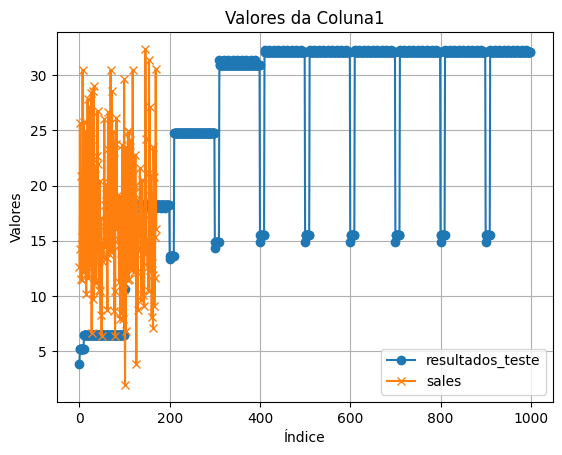

In [ ]:

plt.plot(df_teste['resultados'], marker='o', label='resultados_teste')
plt.plot(df['sales'], marker='x', label='sales')

# Personalizar o gráfico
plt.title('Valores da Coluna1')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid()

plt.show()


In [ ]:
filtered_df_teste_maior_30 = df_teste[ df_teste["resultados"] == df_teste["resultados"].max()]
filtered_df_teste_maior_30.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 410 to 990
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   youtube     54 non-null     int64  
 1   facebook    54 non-null     int64  
 2   newspaper   54 non-null     int64  
 3   resultados  54 non-null     float32
dtypes: float32(1), int64(3)
memory usage: 1.9 KB


In [ ]:
filtered_df_teste_maior_30.head()

,youtube,facebook,newspaper,resultados
410,400,100,0,32.319767
420,400,200,0,32.319767
430,400,300,0,32.319767
440,400,400,0,32.319767
450,400,500,0,32.319767


In [ ]:
filtered_df_teste_maior_30.describe()

,youtube,facebook,newspaper,resultados
count,54.00000,54.000000,54.0,54.000000
mean,650.00000,500.000000,0.0,32.319771
std,172.38614,260.623346,0.0,0.000023
min,400.00000,100.000000,0.0,32.319767
25%,500.00000,300.000000,0.0,32.319767
50%,650.00000,500.000000,0.0,32.319767
75%,800.00000,700.000000,0.0,32.319767
max,900.00000,900.000000,0.0,32.319767
